<a href="https://colab.research.google.com/github/sandhyajnv/Deep-Learning-/blob/main/Image_classification_Using_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers,models

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
Trpath=os.listdir("/content/drive/MyDrive/Data_DL_Assignment5/Group_11/train")
Testpath=os.listdir("/content/drive/MyDrive/Data_DL_Assignment5/Group_11/test")
Valpath=os.listdir("/content/drive/MyDrive/Data_DL_Assignment5/Group_11/val")
Trdata=[]
TrLabel=[]
Testdata=[]
TestLabel=[]
Valdata=[]
ValLabel=[]
data_dict={'scorpion':[1,0,0,0,0],'bonsai':[0,1,0,0,0],'car_side':[0,0,1,0,0],'starfish':[0,0,0,1,0],'buddha':[0,0,0,0,1]}
for i in Trpath:
 
  dataclassTrain=os.listdir("/content/drive/MyDrive/Data_DL_Assignment5/Group_11/train/{}".format(i))
  
    
  for j in dataclassTrain:
    img=plt.imread("/content/drive/MyDrive/Data_DL_Assignment5/Group_11/train/{}/{}".format(i,j))
    if(len(img.shape)!=3):
      img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR )

    imgresize=cv2.resize(img,(224,224))
    Trdata.append(imgresize)
    TrLabel.append(data_dict[i])



  




  



In [ ]:
print(len(Trdata))

250


In [ ]:
for i in Testpath:

  dataclassTest=os.listdir("/content/drive/MyDrive/Data_DL_Assignment5/Group_11/test/{}".format(i))
  
    
  for j in dataclassTest:
    img=plt.imread("/content/drive/MyDrive/Data_DL_Assignment5/Group_11/test/{}/{}".format(i,j))
    if(len(img.shape)!=3):
      img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR )

    imgresize=cv2.resize(img,(224,224))
    Testdata.append(imgresize)
    TestLabel.append(data_dict[i])

In [ ]:
for i in Valpath:

  dataclassVal=os.listdir("/content/drive/MyDrive/Data_DL_Assignment5/Group_11/val/{}".format(i))
  
    
  for j in dataclassVal:
   
    img=plt.imread("/content/drive/MyDrive/Data_DL_Assignment5/Group_11/val/{}/{}".format(i,j))
    if(len(img.shape)!=3):
      img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR )

    imgresize=cv2.resize(img,(224,224))
    Valdata.append(imgresize)
    ValLabel.append(data_dict[i])

In [ ]:
print(len(Testdata))

100


In [ ]:
Trdata=np.array(Trdata)
Testdata=np.array(Testdata)
Valdata=np.array(Valdata)

In [ ]:
TrLabel=np.array(TrLabel)
TestLabel=np.array(TestLabel)
ValLabel=np.array(ValLabel)

In [ ]:
model1=models.Sequential()
model1.add(layers.Conv2D(8,(11,11), activation='relu', input_shape=(224, 224, 3),strides=4,padding='valid'))
model1.add(layers.MaxPooling2D((2,2),strides=2,padding='valid'))
model1.add(layers.Conv2D(16,(5,5), activation='relu', input_shape=(224, 224, 3),strides=4,padding='valid'))
model1.add(layers.MaxPooling2D((3,3),strides=2,padding='valid'))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(5, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)]
model1.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x=Trdata/255.0,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(Valdata/255.0,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
250/250 [==============================] - 5s 19ms/step - loss: 1.6087 - accuracy: 0.2120 - val_loss: 1.5979 - val_accuracy: 0.3600
Epoch 2/10000
250/250 [==============================] - 3s 14ms/step - loss: 1.6048 - accuracy: 0.2560 - val_loss: 1.5836 - val_accuracy: 0.2600
Epoch 3/10000
250/250 [==============================] - 3s 13ms/step - loss: 1.5825 - accuracy: 0.2920 - val_loss: 1.5612 - val_accuracy: 0.2600
Epoch 4/10000
250/250 [==============================] - 3s 13ms/step - loss: 1.5497 - accuracy: 0.2800 - val_loss: 1.5444 - val_accuracy: 0.2800
Epoch 5/10000
250/250 [==============================] - 5s 20ms/step - loss: 1.4730 - accuracy: 0.3640 - val_loss: 1.4371 - val_accuracy: 0.3800
Epoch 6/10000
250/250 [==============================] - 3s 14ms/step - loss: 1.3439 - accuracy: 0.4640 - val_loss: 1.7229 - val_accuracy: 0.2000
Epoch 7/10000
250/250 [==============================] - 4s 14ms/step - loss: 1.1670 - accuracy: 0.5360 - val_loss: 1.2346 -

In [ ]:
predicted=model1.predict(Testdata/255.0)

4/4 [==============================] - 0s 36ms/step


In [ ]:
predtest=np.int_(np.rint(predicted))

In [ ]:
model1.evaluate(Testdata/255.0,TestLabel)

4/4 [==============================] - 0s 34ms/step - loss: 2.3094 - accuracy: 0.4400


[2.309415817260742, 0.4399999976158142]

In [ ]:
print(Testdata.shape)

(100, 224, 224, 3)


In [ ]:

test=[]
testlabel=[]
for i in range(Testdata.shape[0]):
  test.append(np.argmax(predtest[i,:]))
  testlabel.append(np.argmax(TestLabel[i,:]))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(testlabel,test)
print(cm)

[[ 7  2  6  5  0]
 [ 6  8  3  2  1]
 [ 3  0 17  0  0]
 [ 5  1  5  5  4]
 [ 6  2  3  3  6]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense


vgg_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in vgg_model.layers:
    layer.trainable = False


x = vgg_model.output
x = tf.keras.layers.Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dense(5, activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=x)
Adam2=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks1=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)]


model.compile(loss='categorical_crossentropy',
              optimizer=Adam2,
              metrics=['accuracy'])

model.summary()




#model.save('vgg19_5class.h5')


80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:

for i in range(len(vgg_model.layers)):
 layer = vgg_model.layers[i]

#  if 'conv' not in layer.name:
#   continue

 print(i, layer.name, layer.output.shape)

0 input_1 (None, 224, 224, 3)
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_conv4 (None, 56, 56, 256)
11 block3_pool (None, 28, 28, 256)
12 block4_conv1 (None, 28, 28, 512)
13 block4_conv2 (None, 28, 28, 512)
14 block4_conv3 (None, 28, 28, 512)
15 block4_conv4 (None, 28, 28, 512)
16 block4_pool (None, 14, 14, 512)
17 block5_conv1 (None, 14, 14, 512)
18 block5_conv2 (None, 14, 14, 512)
19 block5_conv3 (None, 14, 14, 512)
20 block5_conv4 (None, 14, 14, 512)
21 block5_pool (None, 7, 7, 512)


In [ ]:
model2 = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[20].output)

In [ ]:
vgg_pred_test=model2(Testdata)

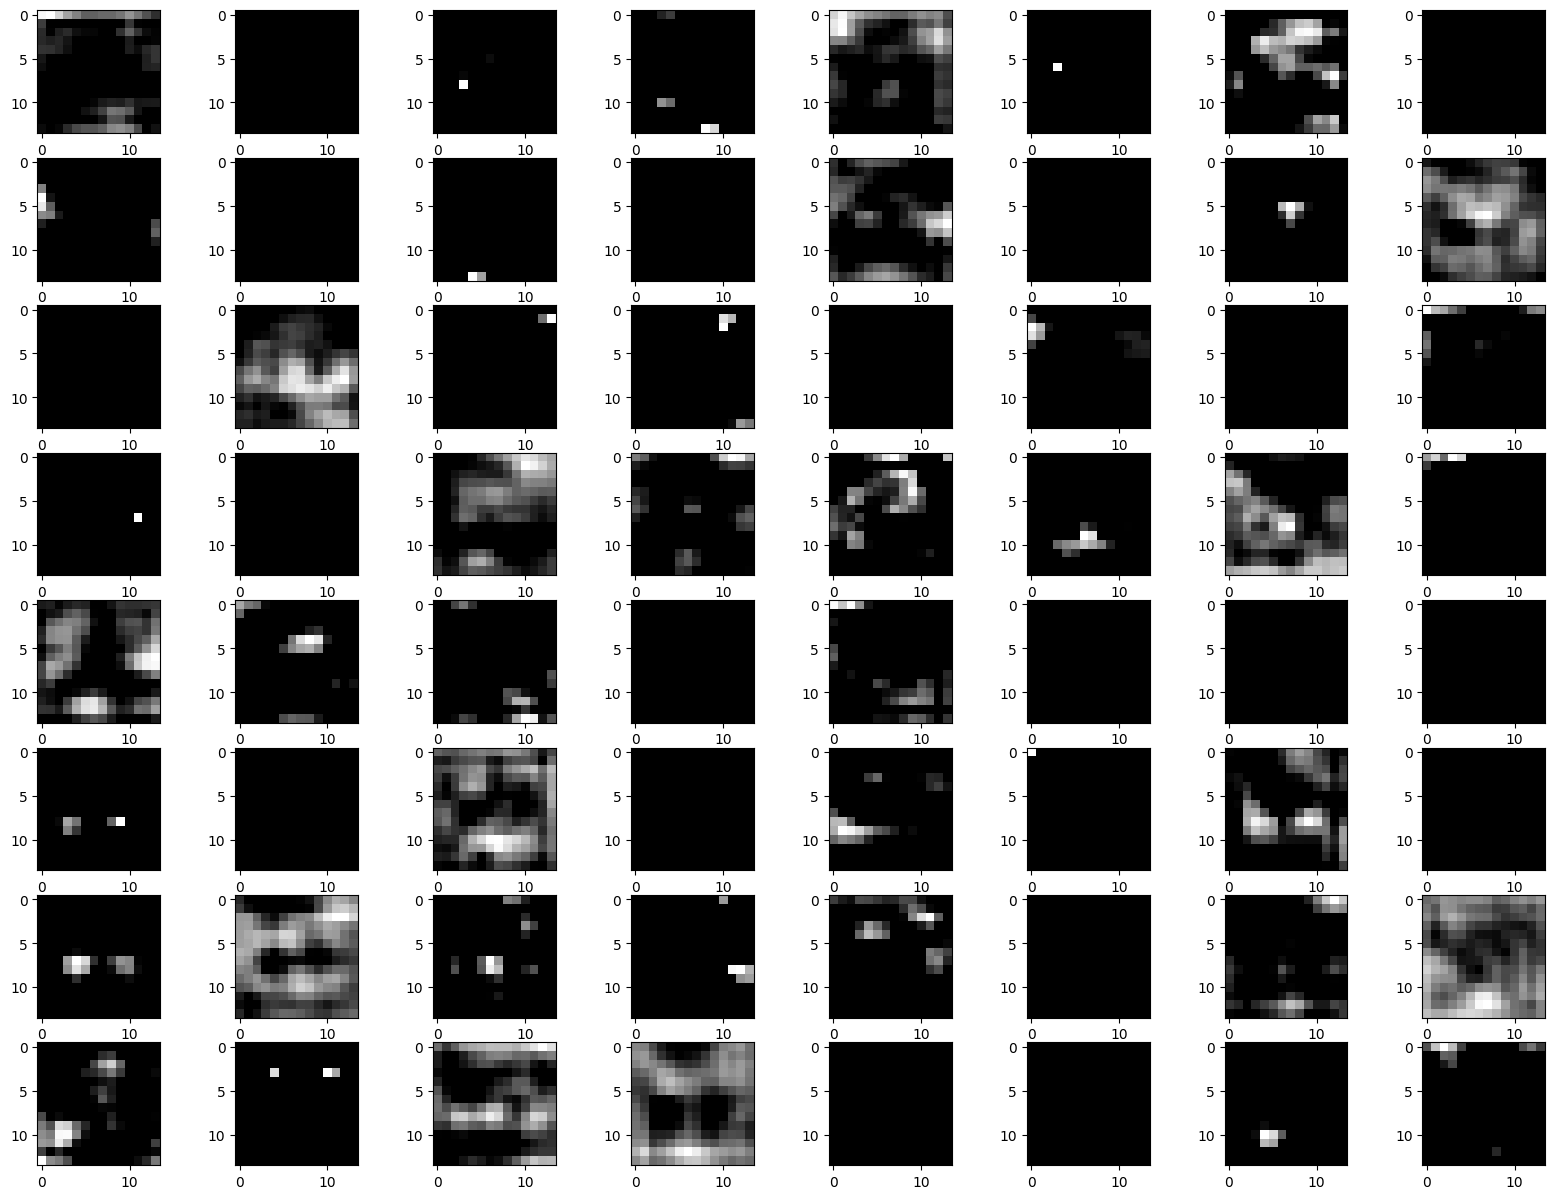

In [ ]:
features = vgg_pred_test
#plt.imshow(features[80,:,:,3]*255.0)
#features.shape[3]+1
fig = plt.figure(figsize=(20,15))
for i in range(1,65):
    plt.subplot(8,8,i)
  
    plt.imshow(features[0,:,:,i-1], cmap='gray')
    
    
plt.show()

In [ ]:
print(vgg_pred_test.shape)

(100, 7, 7, 512)


In [ ]:
history = model.fit(x=Trdata/255.0,y=TrLabel,
                    batch_size=10,epochs=10000,validation_split=0,validation_data=(Valdata/255.0,ValLabel),shuffle=True,validation_batch_size=None,callbacks=my_callbacks1)

Epoch 1/10000
25/25 [==============================] - 319s 13s/step - loss: 2.6398 - accuracy: 0.4640 - val_loss: 0.2373 - val_accuracy: 0.9200
Epoch 2/10000
25/25 [==============================] - 316s 13s/step - loss: 0.1301 - accuracy: 0.9600 - val_loss: 0.0880 - val_accuracy: 0.9800
Epoch 3/10000
25/25 [==============================] - 311s 13s/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 4/10000
25/25 [==============================] - 315s 13s/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 5/10000
25/25 [==============================] - 316s 13s/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 6/10000
25/25 [==============================] - 313s 13s/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 7/10000
25/25 [==============================] - 315s 13s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0295 - val_ac

In [ ]:
model.save('vgg19_5class.h5')

In [ ]:
model.evaluate(Testdata/255.0,TestLabel)

7/7 [==============================] - 143s 20s/step - loss: 0.1234 - accuracy: 0.9600


[0.12344413995742798, 0.9599999785423279]

In [ ]:
predictedvgg19=model.predict(Testdata)
predictedvgg19=np.int_(np.rint(predictedvgg19))
testvgg19=[]
testlabelvgg19=[]
for i in range(Testdata.shape[0]):
  testvgg19.append(np.argmax(predictedvgg19[i,:]))
  testlabelvgg19.append(np.argmax(TestLabel[i,:]))

cmvgg19=confusion_matrix(testlabelvgg19,testvgg19)
print(cmvgg19)

7/7 [==============================] - 138s 19s/step
[[40  0  0  0  0]
 [ 2 38  0  0  0]
 [ 0  0 40  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
